## Grover's Algorithm 

#### Statement and Understanding:  

After [DJ algorithm](https://github.com/suvoooo/Qubits-Qiskit/blob/master/deutsch-jozsa-algorithm.ipynb), we will discuss Grover's algorithm through which it was shown that QCs can substantially faster for searching databases than classical computers. In Chuang and Nielsen's book an example is given as -- Suppose we are given a map containing many cities, and wish to determine the shortest route passing through all cities on the map. A simple algorithm to ﬁnd this route is to search all possible routes through the cities, keeping a running record of which route has
the shortest length. On a classical computer, if there are N possible routes, it obviously takes $O(N)$ operations to determine the shortest route using this method. Remarkably, there is a quantum search algorithm, sometimes known as Grover’s algorithm, which enables this search method to be sped up substantially, requiring only $O(\sqrt N)$ operations. 

The task that Grover's algorithm aims to solve can be expressed as follows: given a classical function $f(x):\{0,1\}^n→\{0,1\}$, where $n$ is the bit-size of the search space, find an input $x_0$ for which $f(x_0)=1$. Our idea is to think about an oracle which has the ability to _recognize_ the solution to the search problem and the recognition is signaled by making use of an oracle qubit. Classically, in the worst-case scenario, we have to evaluate $f(x)$ a total of $N−1$ times, where $N=2^n$, trying out all the possibilities. After $N−1$ elements, we know it must be the last element. We will see that Grover's quantum algorithm can solve this problem much faster, providing a quadratic speed up. Quadratic here implies that only about $\sqrt{N}$ evaluations would be required, compared to $N$.  

### Towards Building the Grover Operator

Let's denote the input we seek by $|x'\rangle$, so $f(x') = 1$ and for any other $x$, $f(x) = 0$. Once again it is important to emphasize that we assume that the solution already exists in the database and we want our algorithm to recognize the solution. The basic idea is we will create a superposition state and rotate this towards $|x'\rangle$ using the Grover operator. 

We start with an initial $n$ bit input state $|0\rangle^{\otimes n}$ and apply $H^{\otimes n}$. we define this superposition state $|\psi\rangle$ that's a superposition of all possible states $|x\rangle$ 

$|\psi\rangle = \frac{1}{\sqrt{2^n}}\, \sum \limits_{x\in \{0, 1\}^n}  |x\rangle\, .... \, (1)$

This superposition state already includes our solution $|x'\rangle$, thus 

$\langle x'|\psi\rangle = \frac{1}{\sqrt{2^n}}\, \sum \limits_{x\in \{0, 1\}^n} \langle x'|x\rangle = \frac{1}{\sqrt{2^n}}\, .... \, (2)$

We can exclude this state (solution) to consider superposition of all the remaining states (bad states) 

$|\psi '\rangle = \frac{1}{\sqrt{2^n - 1}}\, \sum \limits_{x\in \{0, 1\}^n,\, x\neq x' }  \, |x\rangle \, .... \, (3)$ 

These bad states are orthonormal to the solution state (there can also be more than 1 solution). So these good and bad states form an orthonormal basis and we can represent any vector lying in the plane spanned by these orthonormal vectors. Let's do that 

$|\psi\rangle = \frac{1}{\sqrt{2^n}}\,  \sum\limits_{x\in \{0, 1\}^n}   |x\rangle = \frac{1}{\sqrt{2^n}}\, \left(\, |x'\rangle + \sum    |x\rangle \, \right) = \frac{1}{\sqrt{2^n}}\, |x'\rangle + \sqrt{\frac{2^n - 1}{2^n}}\, |\psi '\rangle \, ....\, (4)$

Thus $\langle \psi | \psi '\rangle = \sqrt{\frac{2^n - 1}{2^n}}\, $

Now we introduce a reflection operator $R_{|\psi\rangle} = 2| \psi \rangle \langle \psi| - \mathbb{I}\, ....\, (5)$ 

It is called the reflection operator about $|\psi\rangle$ because it can be geometrically interpreted as reflection about the direction of $|\psi\rangle$. Check it by applying to $|\psi\rangle$ and $|\psi ^{\bot}\rangle$ (state vector perpendicular to $|\psi\rangle$). 

--------------------------------------------------

#### Steps for Grover's Algorithm: 

With these in mind now let's write the steps for the Grover's Algorithm (Grover Iteration)-- 

* Start with a register of $n$ qubits initialized in the state $|0\rangle$.

* Prepare the register into a uniform superposition by applying H to each qubit of the register. 

* Apply the following operations to the register $N_{opt}$ times (we will show later how to derive $N_{opt}$). 
    
    * The phase oracle $O_f$ that applies a conditional phase shift of $−1$ for the solution items.
    * Apply H to each qubit in the register.
    * A conditional phase shift of $−1$ to every computational basis state except $|0\rangle$. This can be represented by the unitary operation $−O_0$, as $O_0$ represents the conditional phase shift to $|0\rangle$ only.
    * Apply H to each qubit in the register.

* Measure the register to obtain the index of a item that's a solution with very high probability. 

* Check if it's a valid solution. If not, start again. 

Now we will understand step by step using the equations above how Grover's algorithm will help us recognize the solution item(s). 

-------------------------------------------

#### Determine Grover Operator

First consider how to interpret the operation of phase oracle $O_f$ that applies a phase shift of $-1$ to the solution state. If we go back to equation 4, we can think of this operation as a reflection about the state $|\psi'\rangle$, or the bad state. Because the solution state is perpendicular to $|\psi'\rangle$. So $O_f = 2|\psi'\rangle \langle \psi'| - \mathbb{I}$. 

Similarly, if we think about the step of applying conditional phase shift of $−1$ to every computational basis state except $|0\rangle$, this step can be represented as $0_0 = -2|0\rangle\langle 0| + \mathbb{I}$. This step is accompanied by applying H gates before and after, so the complete operation can be written as --- 

$$\begin{align}-H^{\otimes n}\, O_o\, H^{\otimes n} & = 2H^{\otimes n}|0\rangle\langle 0|H^{\otimes n} - H^{\otimes n}\,\mathbb{I}\, H^{\otimes n} \\ &= 2|\psi\rangle \langle \psi | - I\, ....\, (6)\end{align}$$ 

So Now we have an operator that represents reflection about the state $|\psi\rangle$, which is our uniform superposition state and this is defined in equation (1). So the complete Grover operator can be written as --- 

$G = \langle (2|\psi\rangle\langle \psi| - \mathbb{I} \rangle) O_f\, ....\, (7)$

So exactly what happened in these steps--- below is a geometric representation--- 

#### _Step 1: Create the Superposition State (Also including the solution state(s))_ 

![groveralgo1](https://drive.google.com/uc?id=1miCqRb0b8mLLeMjVk1OPdGeUPoTkwlh1)

Once again, $|\psi '\rangle$ is the superposition of all the states except the solution state  and $|x'\rangle$ is the solution state. 

#### _Step 2: Reflection About the Bad State_

![groveralgo2](https://drive.google.com/uc?id=1zHNjBjz4dmoAuKZZFM5J3tTwC25qYc7q)

#### _Step 3: Reflection About the Initial Superposition State_

![groveralgo3](https://drive.google.com/uc?id=1sKQf2TG4exP0nJCOQsxIlki3jO-v1QJy)


We repeat the steps to get closer to the solution state(s). 

The combined effect of each Grover iteration is a counterclockwise rotation of an angle $2\theta$. This angle is quite easy to find, from the images we see that $\theta$ is the angle between the initial superposition state $|\psi\rangle$ and $|\psi'\rangle$ (superposition of all states except the solution state). We can use equation (4) to determine $\theta$ and 

$\theta = \text{arccos}\, \left(\sqrt{\frac{2^n - 1}{2^n}}\right)$. 

Here we assumed that there is only one solution state, if we have more than one solution states we can generalize the expression as $\theta = \text{arccos}\, \left(\sqrt{\frac{N - M}{N}}\right)$. It is important to note that we have considered the angle between $|\psi '\rangle$ and $|\psi\rangle$ is considered here as $\theta$ but in some books you may see that it's taken as $\frac{\theta}{2}$ (Nielsen's book). 

If $\text{cos}\,\theta = \left(\sqrt{\frac{2^n - 1}{2^n}}\right)$ then, $\text{sin}\,\theta = \left(\sqrt{\frac{1}{2^n}}\right)$. We can write equation 4 as 

$\begin{align} |\psi\rangle = \frac{1}{\sqrt{2^n}}\,  \sum\limits_{x\in \{0, 1\}^n}   |x\rangle & = \frac{1}{\sqrt{2^n}}\, \left(\, |x'\rangle + \sum    |x\rangle \, \right) \\ & = \text{sin}\, \theta\, |x'\rangle + \text{cos}\, \theta \, |\psi '\rangle \, ....\, (8)\end{align}$ 

As we can see from the figures the combined effect of each Grover iteration is a counterclockwise rotation of an angle $2\theta$. So 
$G|\psi\rangle = \text{sin}\, 3\theta\, |x'\rangle + \text{cos}\, 3\theta \, |\psi '\rangle \, ....\, (9)$. It follows that continued application of G takes the state 

$G^k|\psi\rangle = \text{sin}\, (2k+1)\theta\, |x'\rangle + \text{cos}\, (2k+1)\theta \, |\psi '\rangle \, ....\, (10)$. 

Let's say after $m$ rotation we reached the solution state $|x'\rangle$, so from equation 10, $(2m + 1)\, \theta = \frac{\pi}{2}$. Assuming small angle approximation $\theta = \frac{1}{\sqrt{2^n}}$, thus 

$m\approx \frac{\pi}{4} \sqrt{2^n} - \frac{1}{2}\, ....\, (11)$

Therefore $\sqrt{2^n}$ rotations should suffice to find the solution of the search problem. 


Let's now build a circuit to show Grover's Algorithm in action. We consider 2 qubit gates and let's select the solution state to be $|00\rangle$. So the phase shift oracle we have described before $O_f$ will act as follows --- 

$O_f|\psi\rangle = \frac{1}{2} \left(-|00\rangle + |01\rangle + |10\rangle + |11\rangle\right)$. 



In [ ]:
# !pip3 install qiskit

In [ ]:
import qiskit as q
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def build_circ(num_qbits, num_cbits):
  qr = q.QuantumRegister(num_qbits)
  cr = q.ClassicalRegister(num_cbits)
  final_circ = q.QuantumCircuit(qr, cr)
  return final_circ, qr, cr

def h_gates(qcirc, a, b): # 2 inputs and h gates in parallel
  qcirc.h(a)
  qcirc.h(b)  

In [ ]:
hadamard_front, qr, cr = build_circ(2, 2)
h_gates(hadamard_front, qr[0], qr[1])
hadamard_front.draw() 

┌───┐
q4_0: ┤ H ├
      ├───┤
q4_1: ┤ H ├
      └───┘
c4: 2/═════

In [ ]:
### define the oracle for state 00

hadamard_front.x(qr[0])
hadamard_front.x(qr[1])
hadamard_front.cz(qr[0], qr[1])
hadamard_front.x(qr[0])
hadamard_front.x(qr[1])
hadamard_front.draw()

┌───┐┌───┐   ┌───┐
q4_0: ┤ H ├┤ X ├─■─┤ X ├
      ├───┤├───┤ │ ├───┤
q4_1: ┤ H ├┤ X ├─■─┤ X ├
      └───┘└───┘   └───┘
c4: 2/══════════════════

In [ ]:
### We apply the steps below to create the reflection about the original superposition state
### 1. Apply H to each qubit in the register.
### 2. A conditional phase shift of −1 to every computational basis state except |0⟩. 
### This can be represented by the unitary operation −O_0, as O_0 represents the conditional phase shift to |0⟩ only.
### 3. Apply H to each qubit in the register.

### reflection about state |0> can be thought of as circuit below
### apply z gate to both qubits, then add a cz gate

def reflection_psi(qcirc, a, b):
  h_gates(qcirc, a, b)
  qcirc.z(a)
  qcirc.z(b)
  qcirc.cz(a, b)
  h_gates(qcirc, a, b)

In [ ]:
reflection_psi_circ, qr_rf, cr_rf = build_circ(2, 2)
reflection_psi(reflection_psi_circ, qr_rf[0], qr_rf[1])
reflection_psi_circ.draw()


┌───┐┌───┐   ┌───┐
q5_0: ┤ H ├┤ Z ├─■─┤ H ├
      ├───┤├───┤ │ ├───┤
q5_1: ┤ H ├┤ Z ├─■─┤ H ├
      └───┘└───┘   └───┘
c5: 2/══════════════════

In [ ]:
# !pip3 install pylatexenc

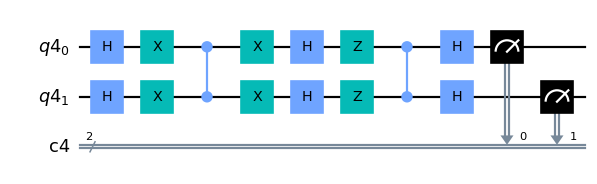

In [ ]:

complete_circuit = hadamard_front.compose(reflection_psi_circ)

for n in range(2):
  complete_circuit.measure(n, n)

complete_circuit.draw('mpl', filename=path+'Grover_Algo_00.png', scale=1.1)

In [ ]:
statevec_sim = q.Aer.get_backend("statevector_simulator")

def statevec_exec(circ):
  statevec = q.execute(circ, backend=statevec_sim).result().get_statevector()
  return statevec

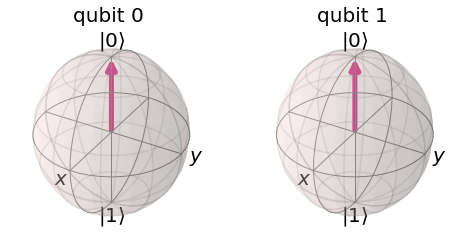

In [ ]:
complete_circuit_statevec = statevec_exec(complete_circuit)
q.visualization.plot_bloch_multivector(complete_circuit_statevec)

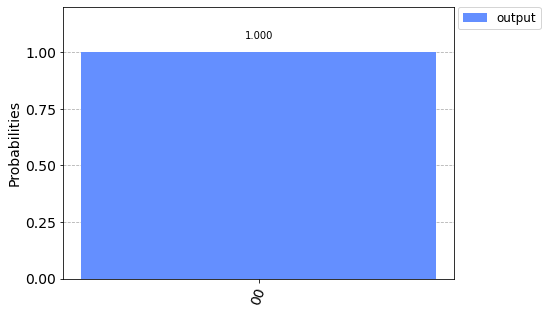

In [ ]:
qasm_sim = q.Aer.get_backend('qasm_simulator')
counts = q.execute(complete_circuit, backend=qasm_sim, shots=1024).result().get_counts()
q.visualization.plot_histogram([counts], legend=['output'])

In [ ]:
from qiskit import IBMQ

IBMQ.save_account('find your token')
IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

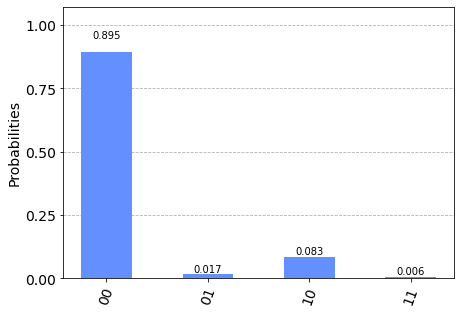

In [ ]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_manila') # check which computer has 0 jobs on queue
job = q.execute(complete_circuit, backend=qcomp)
q_result = job.result()

q.visualization.plot_histogram(q_result.get_counts(complete_circuit))

### Thinking about the Oracle

Consider the superposition state after hadamard gates in parallel 
$|\psi\rangle = \frac{1}{2}\left(|00\rangle + |01\rangle + |10\rangle + |11\rangle\right)$

Consider the $CZ$ gate, matrix representation 

$$CZ\equiv\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0\\0&0&0&-1 \end{bmatrix}$$

$CZ$ will act as an oracle for $|11\rangle$ state. To create the oracle for $|00\rangle$ we apply $X$ gate to each qubit across $CZ$ gate. In a sense we can think of turning the state $|00\rangle$ state to $|11\rangle$. 

Similarly for $|01\rangle$ state we will apply one $X$ gate across the $CZ$ gate and similarly for $|10\rangle$ state, we apply the $X$ gate to the other gate. 

### Instead of $X$ Gate What Other Gate We Can Apply ? 

Let's consider the $|00\rangle$ state. 

We will use the RZ gate ! 

$$RZ (\phi)\equiv \begin{bmatrix} e^{-i\phi/2} & 0  \\ 0 & e^{i\phi/2}   \end{bmatrix}$$

Also , 

$$RZ (\phi)\otimes RZ (\delta)\equiv \begin{bmatrix} e^{\frac{i}{2}(-\phi-\delta)} & 0 & 0 & 0 \\ 0 & e^{\frac{i}{2}(-\phi + \delta)} & 0 & 0 \\ 0 & 0 & e^{\frac{i}{2}(\phi - \delta)} & 0 \\ 0 & 0 & 0 & e^{\frac{i}{2}(\phi + \delta)}  \end{bmatrix}$$


We will use $CZ$ gate sandwiched between $RZ$ gates to create the oracle for $|00\rangle$ state. 

We can use the ```unitary_simulator``` in qiskit to see the output matrices at each stage as below--- 

In [ ]:
check_circ = q.QuantumCircuit(2)
# check_circ.iswap(0, 1)
check_circ.rz(np.pi/2, 0)
check_circ.rz(np.pi/2, 1)
check_circ.cz(0, 1)
check_circ.rz(np.pi/2, 0)
check_circ.rz(np.pi/2, 1)
qasm_sim = q.Aer.get_backend('unitary_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator

job = q.execute(check_circ, qasm_sim)
result = job.result()
print(result.get_unitary(check_circ, decimals=2))

[[-1.-0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j  1.-0.j]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/'

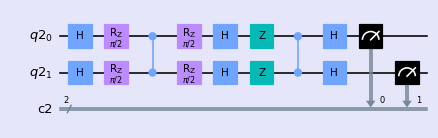

In [ ]:
### let's use the oracke above to check whether we get 00 state as solution or not 

hadamard_front_check, qr_check, cr_check = build_circ(2, 2)
h_gates(hadamard_front_check, qr_check[0], qr_check[1])

#### oracle with rz and cz gate
hadamard_front_check.rz(np.pi/2, qr_check[0])
hadamard_front_check.rz(np.pi/2, qr_check[1])
hadamard_front_check.cz(qr_check[0], qr_check[1])
hadamard_front_check.rz(np.pi/2, qr_check[0])
hadamard_front_check.rz(np.pi/2, qr_check[1])
####

reflection_psi_circ_check, qr_rf_check, cr_rf_check = build_circ(2, 2)
reflection_psi(reflection_psi_circ_check, qr_rf_check[0], qr_rf_check[1])

complete_circuit_check = hadamard_front_check.compose(reflection_psi_circ_check)

for n in range(2):
  complete_circuit_check.measure(n, n)



style = {'backgroundcolor': 'lavender', 'dpi':200, 'subfontsize':10}


complete_circuit_check.draw('mpl', scale=0.8, style=style, filename=path+'Grover_Algo_RZ_00.png')

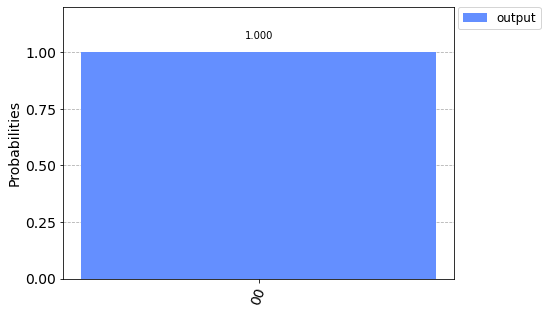

In [ ]:
qasm_sim = q.Aer.get_backend('qasm_simulator')
counts = q.execute(complete_circuit_check, backend=qasm_sim, shots=1024).result().get_counts()
q.visualization.plot_histogram([counts], legend=['output'])

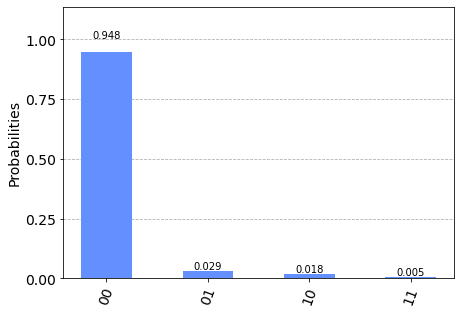

In [ ]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_manila') # check which computer has 0 jobs on queue
job = q.execute(complete_circuit_check, backend=qcomp)
q_result = job.result()

q.visualization.plot_histogram(q_result.get_counts(complete_circuit_check))